In [9]:
import numpy as np
from numpy.linalg import norm as L2
from scipy.stats import norm as univariate_normal
from scipy.stats import multivariate_normal
from tqdm import tqdm_notebook
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import torch
from matplotlib import pyplot as plt
from dataset import MNISTDataset, MNISTFlowDataset
from utils.kde import KDE, kde_evaluation

def show_image(x):
    plt.imshow(x.to('cpu').detach().squeeze().numpy())

In [1]:
a=5

## Save generated data by each model

### Define Generative models

In [33]:
autoencoder = torch.load('trained_models/mnist_ae_noact.model')
autoenocder = autoencoder.to('cuda')
autoencoder.eval()

aae_model = torch.load('trained_models/mnist_aae_1.model')
# aae_model = torch.load('trained_models/mnist_aae_jun7_z_9.model')
aae_model = aae_model.to('cuda')
aae_model.eval()

vae_model = torch.load('trained_models/vae_mnist_zdim_2.model')
# vae_model = torch.load('trained_models/vae_jun7_z_9.model')
vae_model = vae_model.to('cuda')
vae_model.eval()


class Generator:
    def __init__(self):
        self.flow_model = torch.load('trained_models/mnist_flow_3.model')
        self.flow_model = self.flow_model.to('cuda')
        self.flow_model.eval()
        self.autoencoder = torch.load('trained_models/mnist_ae_noact.model')
        self.autoenocder = self.autoencoder.to('cuda')
        self.autoencoder.eval()
        
    def __call__(self, z):
        z = z.to('cuda')
        z = self.flow_model.reverse(z)
        return self.autoencoder.decoder(z)

ae = autoencoder.decoder
flow = Generator()
aae = aae_model.autoencoder.decoder
vae = vae_model.decoder



In [4]:
image_test_set = MNISTDataset(path='data/MNIST/processed', train=False, normalize=True)
x_test = image_test_set.dataset
x_test = x_test.reshape(x_test.shape[0], -1)

# Chop down dimensions for faster computation
pca_obj = PCA(n_components=154) #n_components=154 has 95% of explained variance
x_test_pca = pca_obj.fit_transform(x_test)

# x_test_pca = pca_obj.transform(x_test)

/scratch/sagar/Projects/flow/ae_flow/dataset.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dataset = torch.tensor(self.dataset, dtype=torch.float32)


In [5]:
ae_data = ae(torch.randn((10000,2), dtype=torch.float32).to('cuda'))
ae_data = ae_data.reshape(ae_data.shape[0], -1)
x_train = ae_data.to('cpu').detach()
x_train_pca = pca_obj.transform(x_train)

KDE(x_train_pca[:10000], 1.16).average_log_likelihood(x_test_pca[:1000], batch_size=100)

(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)


-322.67112583990416

In [7]:
vae_data = vae(torch.randn((10000,2), dtype=torch.float32).to('cuda'))
vae_data = vae_data.reshape(vae_data.shape[0], -1)
x_train = vae_data.to('cpu').detach()
x_train_pca = pca_obj.transform(x_train)

KDE(x_train_pca[:10000], 1.16).average_log_likelihood(x_test_pca[:1000], batch_size=100)

(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)


-266.14919215017846

In [6]:
aae_data = aae(torch.randn((10000,2), dtype=torch.float32).to('cuda'))
aae_data = aae_data.reshape(aae_data.shape[0], -1)
x_train = aae_data.to('cpu').detach()
x_train_pca = pca_obj.transform(x_train)

KDE(x_train_pca[:10000], 1.16).average_log_likelihood(x_test_pca[:1000], batch_size=100)

(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)


-379.32889962518215

In [8]:
flow_data = flow(torch.randn((10000,2), dtype=torch.float32).to('cuda'))
flow_data = flow_data.reshape(flow_data.shape[0], -1)
x_train = flow_data.to('cpu').detach()
x_train_pca = pca_obj.transform(x_train)

KDE(x_train_pca[:10000], 1.16).average_log_likelihood(x_test_pca[:1000], batch_size=100)

(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)
(10000, 154) (100, 154)


-256.7507191099663

## Reconstruction Error

In [8]:
# autoencoder = torch.load('trained_models/mnist_ae_noact.model')
autoencoder = torch.load('trained_models/mnist_ae_jun7_z_9.model')
autoenocder = autoencoder.to('cuda')
autoencoder.eval()

# aae_model = torch.load('trained_models/mnist_aae_1.model')
aae_model = torch.load('trained_models/mnist_aae_jun7_z_9.model')
aae_model = aae_model.to('cuda')
aae_model.eval()

# vae_model = torch.load('trained_models/vae_mnist_zdim_2.model')
vae_model = torch.load('trained_models/vae_jun7_z_9.model')
vae_model = vae_model.to('cuda')
vae_model.eval()


image_test_set = MNISTDataset(path='data/MNIST/processed', train=False, normalize=True)

inp = image_test_set.dataset.unsqueeze(dim=1)
inp = inp[:1000].to('cuda')

# AE
out = autoencoder(inp)
ae_err = torch.norm(out-inp)

# VAE
a = vae_model(inp)
vae_err = torch.norm(a[0]-inp)

# AAE
out = aae_model(inp)
aae_err = torch.norm(out-inp)

print('ae: {}, vae: {}, aae: {}'.format(ae_err.item(), vae_err.item(), aae_err.item()))

NameError: name 'torch' is not defined

AttributeError: 'Figure' object has no attribute 'tight_subplots'

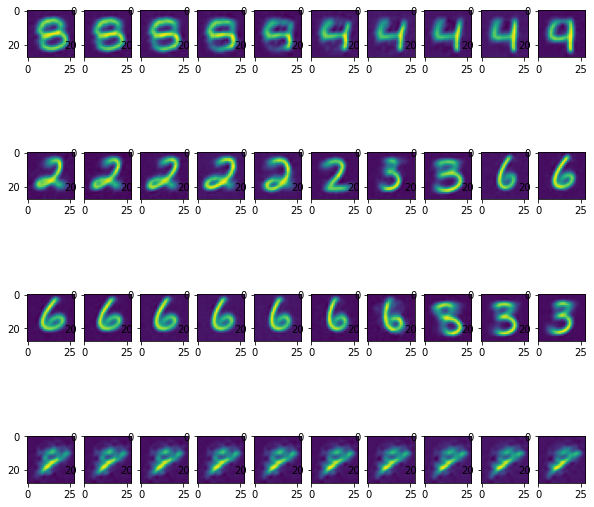

In [21]:
z1 = torch.randn((1,2), dtype=torch.float32).to('cuda')
z2 = torch.randn((1,2), dtype=torch.float32).to('cuda')

d = z2-z1
N = 10
fig, axes = plt.subplots(4,N, figsize=(10,10))

z = z1
for i in range(N):
    axes[0,i].imshow(ae(z).to('cpu').detach().squeeze().numpy())
    axes[1,i].imshow(flow(z).to('cpu').detach().squeeze().numpy())
    axes[2,i].imshow(vae(z).to('cpu').detach().squeeze().numpy())
    axes[3,i].imshow(aae(z).to('cpu').detach().squeeze().numpy())
    
    z = z + 1/N *d
fig.tight_subplots()

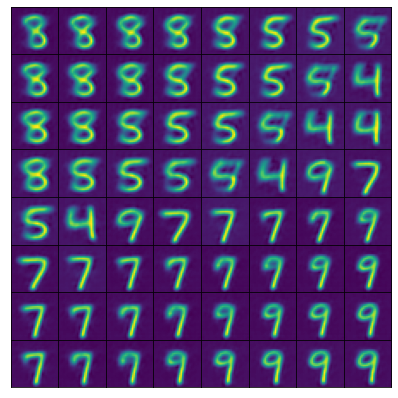

In [62]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

n_row = 8
n_col = 8
z = torch.randn((n_row,n_col,2), dtype=torch.float32)
z[0,0,:] = torch.tensor((-1,-1),dtype=torch.float32)
z[0,n_col-1,:] = torch.tensor((1,-1),dtype=torch.float32)
z[n_row-1,0,:] = torch.tensor((-1,1),dtype=torch.float32)
z[n_col-1,n_row-1,:] = torch.tensor((1,1),dtype=torch.float32)

z = 0.2*z
for j in range(n_col):
    z[0,j,:] = z[0,0,:] + j*(1/(n_col-1))*(z[0,n_col-1,:] - z[0,0,:])

for j in range(n_col):
    z[n_row-1,j,:] = z[n_row-1, 0, :] + j*(1/(n_col-1))*(z[n_row-1, n_col-1, :] - z[n_row-1,0,:])

    
for i in range(n_row-1):
    for j in range(n_col):
        z[i+1,j,:] = z[0,j,:] + (i+1)/(n_col-1) * (z[n_row-1,j,:] -z[0,j,:])


fig = plt.figure(figsize=(7,7))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [z[i//n_row, (i%n_col), :] for i in range(n_col*n_row)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(flow(im.unsqueeze(dim=0).to('cuda')).to('cpu').detach().squeeze().numpy())
    ax.set_xticks([])
    ax.set_yticks([])
    

plt.show()


In [64]:
fig.savefig('data/manifold.pdf')

In [ ]:
plt.save('latent')

In [29]:
flow(z[0,0,:].unsqueeze(dim=0)).shape

torch.Size([1, 1, 28, 28])

In [26]:
z.shape

torch.Size([8, 8, 2])

In [18]:
[z[(i+1)//n_row, (i%n_col), :] for i in range(n_col*n_row)]

IndexError: index 8 is out of bounds for dimension 0 with size 8

In [25]:
flow(torch.randn((1,2), dtype=torch.float32)).shape

torch.Size([1, 1, 28, 28])

In [21]:
[(i)//n_col for i in range(64)]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [ ]:
flo